## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Game Sales Data from 2019 Dataset

In [2]:
gamedata = pd.read_csv("vgsales-12-4-2019.csv")


## Data Cleaning

In [3]:

gamedata['Total_Shipped'] = gamedata['Total_Shipped'].fillna(gamedata['Global_Sales'])
gamedata = gamedata.fillna(0)

gamedata = gamedata[gamedata['Total_Shipped'] != 0]

## Gathering required Data from total Dataset

In [4]:
sportsGames_Data = gamedata.where(gamedata["Genre"] == 'Sports').dropna()
racingGames_Data = gamedata.where(gamedata["Genre"] == 'Racing').dropna()
sportsGames_Data["Total_Shipped"]

0        82.86
4        33.09
16       22.67
17       21.13
68       11.80
         ...  
19700     0.01
19732     0.01
19765     0.01
19810     0.01
19835     0.01
Name: Total_Shipped, Length: 2558, dtype: float64

In [5]:
sportsGames_TotalShipped = sportsGames_Data.sum(numeric_only=True)['Total_Shipped']
racingGames_TotalShipped = racingGames_Data.sum(numeric_only=True)['Total_Shipped']

## Total Sales for two different Categories

In [6]:
print('Total number of sales in Sports Genre: ', sportsGames_TotalShipped)
print('Total number of sales in Racing Genre: ', racingGames_TotalShipped)

Total number of sales in Sports Genre:  1464.1
Total number of sales in Racing Genre:  806.6399999999999


In [7]:
sportsGames_YearlyData = sportsGames_Data.groupby('Year').sum()[1:]
racingGames_YearlyData = racingGames_Data.groupby('Year').sum()[1:]

## Grouping by Year Game data Analysis

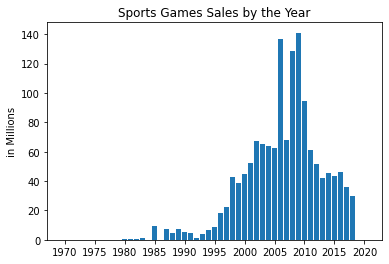

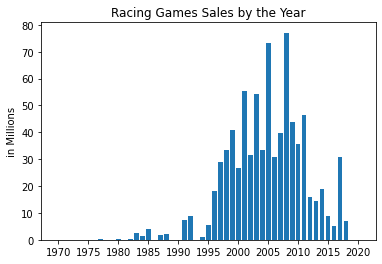

In [8]:
plt.bar(sportsGames_YearlyData.index.tolist(), sportsGames_YearlyData['Total_Shipped'].tolist(), width=0.8)
plt.xticks(np.arange(min(sportsGames_YearlyData.index.tolist()), max(sportsGames_YearlyData.index.tolist())+1, 5))
plt.title('Sports Games Sales by the Year')
plt.ylabel('in Millions')
plt.show()

plt.bar(racingGames_YearlyData.index.tolist(), racingGames_YearlyData['Total_Shipped'].tolist(), width=0.8)
plt.xticks(np.arange(min(racingGames_YearlyData.index.tolist()), max(racingGames_YearlyData.index.tolist())+1, 5))
plt.ylabel('in Millions')
plt.title('Racing Games Sales by the Year')
plt.show()

## Plotting total gales sales of Sports category compared to other Genre's

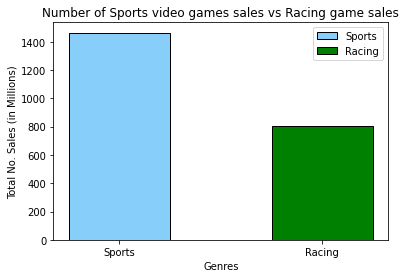

In [17]:

plt.bar(0+0.3, sportsGames_TotalShipped, color = 'lightskyblue',
        width = 0.2, edgecolor = 'black',
        label='Sports')
plt.bar(1-0.3, racingGames_TotalShipped, color = 'g',
        width = 0.2, edgecolor = 'black',
        label='Racing')

plt.xlabel("Genres")
plt.ylabel("Total No. Sales (in Millions)")
plt.title("Number of Sports video games sales vs Racing game sales")
  
# plt.grid(linestyle='--')
plt.xticks( [0+0.3,1-0.3], ['Sports','Racing'])
plt.legend()
  
plt.show()